## Day 27 Lecture 1 Assignment

In this assignment, we will learn statistical significance in linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [0]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [129]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. To use these features, we must clean the data.

Start by creating dummy variables out of the type and content rating columns.

In [0]:
# answer below:

reviews = pd.concat([reviews, pd.get_dummies(reviews['Type'], prefix='Type', 
                                   drop_first=True)], axis=1)

reviews = pd.concat([reviews, pd.get_dummies(reviews['Content Rating'], 
                                             prefix='Content Rating', 
                                             drop_first=True)], axis=1)

reviews.drop(columns=['Type', 'Content Rating'], axis=1, inplace=True)

Next, check for missing values and remove all rows containing missing values

In [131]:
# answer below:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 18 columns):
App                            10841 non-null object
Category                       10841 non-null object
Rating                         9367 non-null float64
Reviews                        10841 non-null object
Size                           10841 non-null object
Installs                       10841 non-null object
Price                          10841 non-null object
Genres                         10841 non-null object
Last Updated                   10841 non-null object
Current Ver                    10833 non-null object
Android Ver                    10838 non-null object
Type_Free                      10841 non-null uint8
Type_Paid                      10841 non-null uint8
Content Rating_Everyone        10841 non-null uint8
Content Rating_Everyone 10+    10841 non-null uint8
Content Rating_Mature 17+      10841 non-null uint8
Content Rating_Teen            10841 non-null ui

In [132]:
nulls = reviews.isnull().sum()
drops = nulls[nulls>0].index

drops

Index(['Rating', 'Current Ver', 'Android Ver'], dtype='object')

In [133]:
reviews.dropna()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,1,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,1,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,0,Education,"June 18, 2017",1.0.0,4.1 and up,1,0,1,0,0,0,0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",0,Education,"July 25, 2017",1.48,4.1 and up,1,0,1,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,0,Education,"July 6, 2018",1.0,4.1 and up,1,0,1,0,0,0,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",0,Books & Reference,"January 19, 2015",Varies with device,Varies with device,1,0,0,0,1,0,0


To simplify, we will remove the app, category, size, installs, genres, last updated, current ver, and android ver columns. 

In [134]:
# answer below:
reviews.drop(columns=['App', 'Category', 'Size', 'Installs', 'Genres', 
                      'Last Updated', 'Current Ver', 'Android Ver'], axis=1, 
             inplace=True)

reviews.head()

,Rating,Reviews,Price,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,0,1,0,1,0,0,0,0
1,3.9,967,0,1,0,1,0,0,0,0
2,4.7,87510,0,1,0,1,0,0,0,0
3,4.5,215644,0,1,0,0,0,0,1,0
4,4.3,967,0,1,0,1,0,0,0,0


Next, check that all the columns are of numeric type and change the type of columns that are not numeric. If coercing to numeric causes missing values, remove those rows containing missing values from our dataset.

In [135]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
Rating                         9367 non-null float64
Reviews                        10841 non-null object
Price                          10841 non-null object
Type_Free                      10841 non-null uint8
Type_Paid                      10841 non-null uint8
Content Rating_Everyone        10841 non-null uint8
Content Rating_Everyone 10+    10841 non-null uint8
Content Rating_Mature 17+      10841 non-null uint8
Content Rating_Teen            10841 non-null uint8
Content Rating_Unrated         10841 non-null uint8
dtypes: float64(1), object(2), uint8(7)
memory usage: 328.3+ KB


In [136]:
reviews['Price'].value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$1.61          1
$28.99         1
$30.99         1
$2.60          1
$379.99        1
Name: Price, Length: 93, dtype: int64

In [0]:
reviews['Price'] = [x.replace('$','') for x in reviews['Price']]

In [138]:
reviews['Price'].value_counts()

0         10040
0.99        148
2.99        129
1.99         73
4.99         72
          ...  
46.99         1
14.00         1
154.99        1
3.08          1
30.99         1
Name: Price, Length: 93, dtype: int64

In [0]:
reviews['Price'] = pd.to_numeric(reviews['Price'], errors='coerce')

In [0]:
reviews['Reviews'] = pd.to_numeric(reviews['Reviews'], errors='coerce')

In [0]:
reviews.dropna(inplace=True)

Perform a train test split with 20% of the data in the test sample.

In [142]:
reviews.columns

Index(['Rating', 'Reviews', 'Price', 'Type_Free', 'Type_Paid',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated'],
      dtype='object')

In [0]:
# answer below:
from sklearn.model_selection import train_test_split

X = reviews[['Reviews', 'Price', 'Type_Free', 'Type_Paid',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated']]
y = reviews['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

Now generate a linear model using statsmodels or sklearn and produce a p value for each coefficient in the model. Analyze the results.

In [149]:
#answer below:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

results.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.863
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           3.73e-12
Time:                        19:32:52   Log-Likelihood:                -5596.4
No. Observations:                7492   AIC:                         1.121e+04
Df Residuals:                    7483   BIC:                         1.127e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.9019      0.197     14.742      0.000       2.516       3.288
Reviews                       1.23e-08   2.05e-09      6.002      0.000    8.28e-09    1.63e-08
Price                          -0.0011      0.000     -2.387      0.017      -0.002      -0.000
Type_Free                       1.3978      0.099     14.167      0.000       1.204       1.591
Type_Paid                       1.5041      0.100     15.097      0.000       1.309       1.699
Content Rating_Everyone        -0.1228      0.295     -0.416      0.677      -0.701       0.456
Content Rating_Everyone 10+    -0.0786      0.296     -0.265      0.791      -0.660       0.503
Content Rating_Mature 17+      -0.1796      0.296     -0.606      0.544      -0.760       0.401
Content Rating_Teen            -0.0841      0.296     -0.285      0.776      -0.663       0.495
Content Rating_Unrated         -0.1997      0.590     -0.338      0.735      -1.356       0.957
==============================================================================
Omnibus:                     3009.120   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15758.665
Skew:                          -1.877   Prob(JB):                         0.00
Kurtosis:                       9.033   Cond. No.                     1.35e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.58e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#Check model assumptions of homoscedacity, normality of errors, and multicollinearity

In [152]:
# normality of errors
predictions = results.predict(X_train)
errors = y_train - predictions

print("Mean of the errors in the ratings model is: {}".format(np.mean(errors)))

Mean of the errors in the ratings model is: 1.4534192796907131e-12


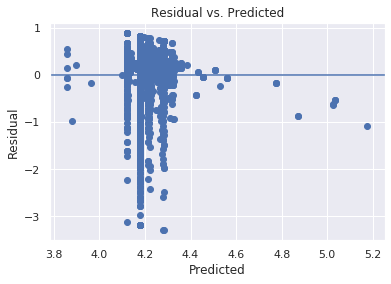

In [153]:
# check for homescedacity
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
sns.set()

In [154]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 24655.8 and p value is 0
Levene test statistic value is 4933.68 and p value is 0


In [155]:
# variance inflation factor (above 5 is suspicious and above 10 is collinear)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)
pd.Series([variance_inflation_factor(X.values, i)
    for i in range (X.shape[1])],
    index= X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const                            0.000000
Reviews                          1.012991
Price                            1.052488
Type_Free                             inf
Type_Paid                             inf
Content Rating_Everyone        514.115911
Content Rating_Everyone 10+    127.698736
Content Rating_Mature 17+      147.055734
Content Rating_Teen            320.411734
Content Rating_Unrated           1.333191
dtype: float64

In [156]:
X.corr()

,const,Reviews,Price,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviews,NaN,1.000000,-0.009820,0.043290,-0.043290,-0.084747,0.080898,-0.006250,0.060966,-0.001686
Price,NaN,-0.009820,1.000000,-0.223040,0.223040,0.016212,-0.007532,-0.010294,-0.008774,-0.000628
Type_Free,NaN,0.043290,-0.223040,1.000000,-1.000000,-0.040918,-0.011651,0.028894,0.039328,0.002815
Type_Paid,NaN,-0.043290,0.223040,-1.000000,1.000000,0.040918,0.011651,-0.028894,-0.039328,-0.002815
Content Rating_Everyone,NaN,-0.084747,0.016212,-0.040918,0.040918,1.000000,-0.410822,-0.444287,-0.706444,-0.020178
Content Rating_Everyone 10+,NaN,0.080898,-0.007532,-0.011651,0.011651,-0.410822,1.000000,-0.047869,-0.076115,-0.002174
Content Rating_Mature 17+,NaN,-0.006250,-0.010294,0.028894,-0.028894,-0.444287,-0.047869,1.000000,-0.082315,-0.002351
Content Rating_Teen,NaN,0.060966,-0.008774,0.039328,-0.039328,-0.706444,-0.076115,-0.082315,1.000000,-0.003738
Content Rating_Unrated,NaN,-0.001686,-0.000628,0.002815,-0.002815,-0.020178,-0.002174,-0.002351,-0.003738,1.000000


##Using the information above, try to select only the variables you think will lead to a better model and construct that model. Print out a summary

In [157]:
import statsmodels.api as sm

X = reviews[['Reviews', 'Price', 'Type_Paid', 'Type_Free']]

y = reviews['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

results.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     18.84
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           3.64e-12
Time:                        19:38:25   Log-Likelihood:                -5200.8
No. Observations:                7024   AIC:                         1.041e+04
Df Residuals:                    7020   BIC:                         1.044e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8243      0.008    347.120      0.000       2.808       2.840
Reviews     1.232e-08   2.04e-09      6.025      0.000    8.31e-09    1.63e-08
Price         -0.0012      0.000     -2.601      0.009      -0.002      -0.000
Type_Paid      1.4658      0.016     92.477      0.000       1.435       1.497
Type_Free      1.3585      0.009    152.160      0.000       1.341       1.376
==============================================================================
Omnibus:                     2832.927   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15015.062
Skew:                          -1.880   Prob(JB):                         0.00
Kurtosis:                       9.096   Cond. No.                     1.47e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.95e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##Plot the scatterplots between the independent variables you select and ratings. Do you think given this graph, these variables have good predictive power?

In [164]:
#loop for plotting features
for x in X_test.columns: 
    plt.figure(figsize=(10,8)) 
    plt.scatter(X[x], y) 
    plt.xlabel(f'feature {x}’) 
    plt.ylabel('Rating’) 
    plt.show()

SyntaxError: ignored